# Derivação Numérica
## Diferenças Finitas
-  Com as técnicas abordadas, é possível calcular aproximadamente a derivada de uma função a partir de um conjunto discreto de pontos ${\{(x_i, y_i)}\}_{i=1,n}$

Em funções contínuas, podemos definir
$$ f'(x_0) = lim_{h\rightarrow 0}\dfrac{f(x_0 + h) - f(x_0)}{h}$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = np.pi * 4
n = 100

x = np.linspace(a, b, n)
y = np.cos(x)

def plot(x, y, y_, title=''):
    plt.plot(x, y, label='f(x)')
    plt.plot(x, y_, label='f\'(x)')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()
    
def disp(x, y, y_, label:str='y\''):
    display(pd.DataFrame({'x':x,'y':y,label:y_}))


### Diferença finita progressiva

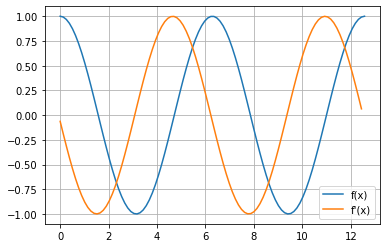

In [13]:
def diff_fwd(x, y):
    n = len(x)
    
    y_1 = [(y[i + 1] - y[i])/(x[i + 1] - x[i]) for i in range(n-1)] + [np.nan]
    return y_1

y_ = diff_fwd(x, y)
plot(x, y, y_)

### Diferença finita regressiva

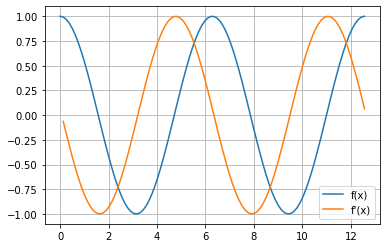

In [14]:
def diff_bwd(x, y):
    n = len(x)
    y_1 = [np.nan] + [(y[i] - y[i-1])/(x[i] - x[i-1]) for i in range(1, n)]
    return y_1

y_ = diff_bwd(x, y)
plot(x, y, y_)

### Diferença finita central

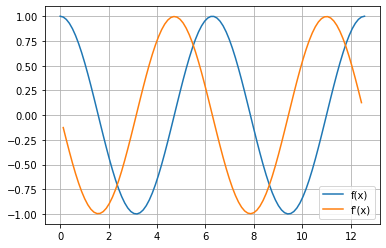

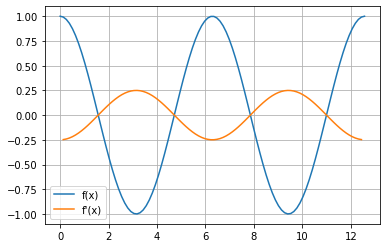

In [15]:
def diff_mid(x, y, h=None):
    n = len(x)
    if h == None:
        y_1 = np.array([np.nan] + [(y[i+1] - y[i-1])/(x[i+1] - x[i-1]) for i in range(1, n-1)] + [np.nan])
    else:
        y_1 = np.array([np.nan] + [(y[i+1] - y[i-1])/(2*h) for i in range(1, n-1)] + [np.nan])
    return y_1

def diff_2(x, y):
    n = len(x)
    y_1 = [0] + [(y[i+1] - 2* y[i] + y[i-1])/((x[i+1] - x[i-1]) * (x[i+1] - x[i-1])) for i in range(1, n-1)]
    y_1[0] = np.nan
    y_1.append(np.nan)
    y_1 = np.array(y_1)
    return y_1

y_ = diff_mid(x, y)
plot(x, y, y_)

y_ = diff_2(x, y)
plot(x, y, y_)

## Exercícios

### Questão 1

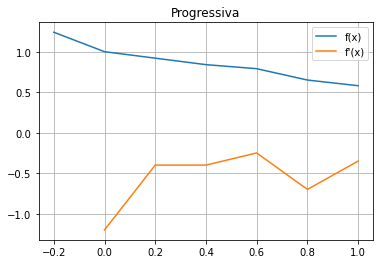

,x,y,y'
0,-0.2,1.24,NaN
1,0.0,1.00,-1.20
2,0.2,0.92,-0.40
3,0.4,0.84,-0.40
4,0.6,0.79,-0.25
5,0.8,0.65,-0.70
6,1.0,0.58,-0.35


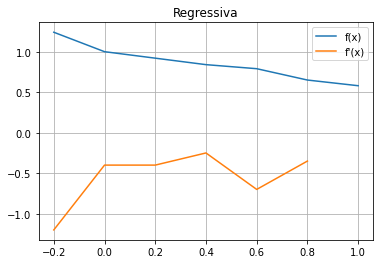

,x,y,y'
0,-0.2,1.24,-1.20
1,0.0,1.00,-0.40
2,0.2,0.92,-0.40
3,0.4,0.84,-0.25
4,0.6,0.79,-0.70
5,0.8,0.65,-0.35
6,1.0,0.58,NaN


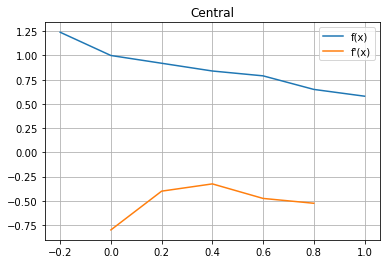

,x,y,y'
0,-0.2,1.24,NaN
1,0.0,1.00,-0.800
2,0.2,0.92,-0.400
3,0.4,0.84,-0.325
4,0.6,0.79,-0.475
5,0.8,0.65,-0.525
6,1.0,0.58,NaN


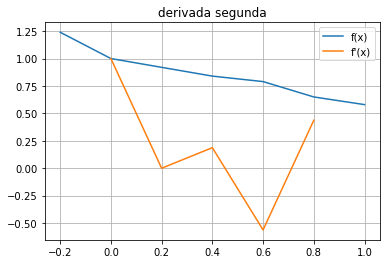

,x,y,y''
0,-0.2,1.24,NaN
1,0.0,1.00,1.0000
2,0.2,0.92,0.0000
3,0.4,0.84,0.1875
4,0.6,0.79,-0.5625
5,0.8,0.65,0.4375
6,1.0,0.58,NaN


In [16]:
import pandas as pd
x_ = [-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_ = [1.24, 1.0, 0.92, 0.84, 0.79, 0.65, 0.58]

y1 = diff_bwd(x_, y_)
y2 = diff_fwd(x_, y_)
y3 = diff_mid(x_, y_)
y_2 = diff_2(x_, y_)

plot(x_, y_, y1, 'Progressiva')
disp(x_, y_, y1)
plot(x_, y_, y2, 'Regressiva')
disp(x_, y_, y2)
plot(x_, y_, y3, 'Central')
disp(x_, y_, y3)
plot(x_, y_, y_2, 'derivada segunda')
disp(x_, y_, y_2, 'y\'\'')

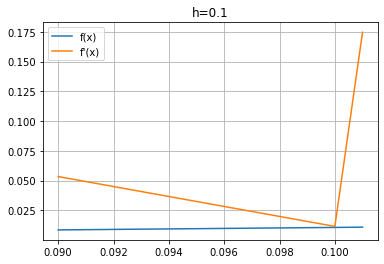

,x,y,y'
0,0.090,0.008597,0.053419
1,0.100,0.010684,0.011542
2,0.101,0.010906,0.174638


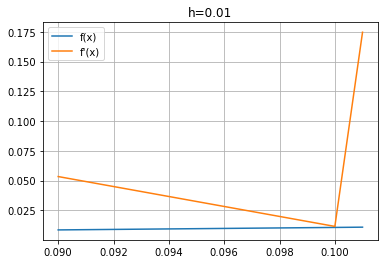

,x,y,y'
0,0.090,0.008597,0.534185
1,0.100,0.010684,0.115425
2,0.101,0.010906,1.746375


In [17]:
x_ = [0, 0.09, 0.1, 0.101, 0.2]
y_ = [0, 0.0085971, 0.0106837, 0.0109056, 0.0456112]
y1 = diff_mid(x_, y_, 0.1)
y2 = diff_mid(x_, y_, 0.01)
plot(x_[1:len(x_)-1], y_[1:len(y_)-1], y1[1:len(y_)-1], 'h=0.1')
disp(x_[1:len(x_)-1], y_[1:len(x_)-1], y1[1:len(y_)-1])

plot(x_[1:len(x_)-1], y_[1:len(y_)-1], y1[1:len(y_)-1], 'h=0.01')
disp(x_[1:len(x_)-1], y_[1:len(x_)-1], y2[1:len(y_)-1])


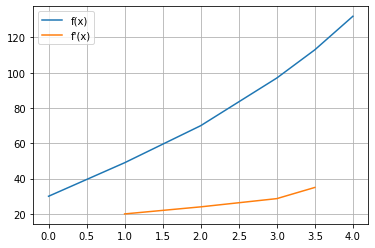

,x,y,y'
0,0.0,30,NaN
1,1.0,49,20.000000
2,2.0,70,24.000000
3,3.0,97,28.666667
4,3.5,113,35.000000
5,4.0,132,NaN


In [18]:
t = [0,1,2,3,3.5,4]
y = [30,49,70,97,113,132]

plot(t, y, diff_mid(t, y))
disp(t, y, diff_mid(t, y))

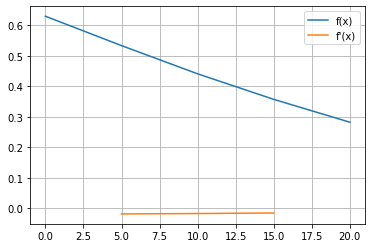

,x,y,y'
0,0,0.6300,NaN
1,5,0.5336,-0.01890
2,10,0.4410,-0.01764
3,15,0.3572,-0.01588
4,20,0.2822,NaN


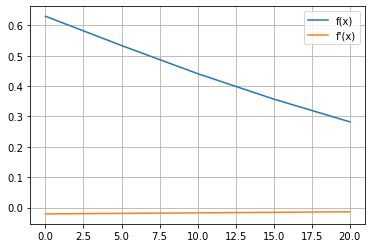

,x,y,y'
0,0,0.6300,-0.021095
1,5,0.5336,-0.019414
2,10,0.4410,-0.017649
3,15,0.3572,-0.015884
4,20,0.2822,-0.014118


In [19]:
t = [0, 5, 10, 15, 20]
q = np.array([0.63, 0.5336, 0.4410, 0.3572, 0.2822])

q1 = diff_mid(t, q)
plot(t, q, q1)
disp(t, q, q1)
q_= -0.6 * 0.01*np.sqrt(2*9.81 * q)
plot(t, q, q_)
disp(t, q, q_)

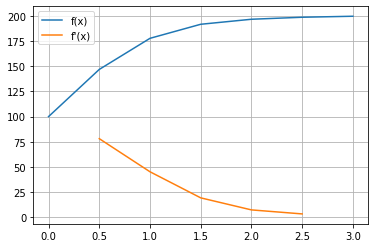

,x,y,y'
0,0.0,100,NaN
1,0.5,147,78.0
2,1.0,178,45.0
3,1.5,192,19.0
4,2.0,197,7.0
5,2.5,199,3.0
6,3.0,200,NaN


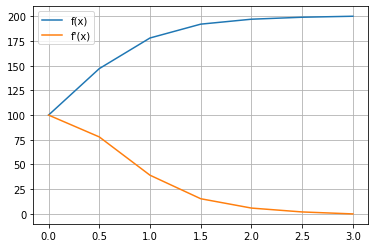

,x,y,y'
0,0.0,100,100.00
1,0.5,147,77.91
2,1.0,178,39.16
3,1.5,192,15.36
4,2.0,197,5.91
5,2.5,199,1.99
6,3.0,200,0.00


In [20]:
t = np.arange(0,3.5, 0.5)
n = np.array([100,147,178,192,197,199,200])
dn = diff_mid(t, n)
dn_ = 2*n - 0.01 * n**2
plot(t, n, dn)
disp(t, n, dn)
plot(t, n, dn_)
disp(t, n, dn_)

In [21]:
f = lambda x: (np.sin(x+2) - np.exp(-x**2))/(np.log(x+2) + x**2) + x
x = 2.5
hs = [0.1, 0.01, 0.001]
for h in hs:
    print(f'h = {h}:')
    print(f'\tf\'({x}) = {(f(x + h) - f(x - h)) / (2 * h)}')
    print(f'\tf\'({x}) = {(f(x + h) - f(x - h)) / (2 * h)}')
    print(f'\tf\'({x}) = {(f(x + h) - f(x - h)) / (2 * h)}')
    


h = 0.1:
	f'(2.5) = 1.0588979607694426
	f'(2.5) = 1.0588979607694426
	f'(2.5) = 1.0588979607694426
h = 0.01:
	f'(2.5) = 1.0591284121240774
	f'(2.5) = 1.0591284121240774
	f'(2.5) = 1.0591284121240774
h = 0.001:
	f'(2.5) = 1.0591307196463617
	f'(2.5) = 1.0591307196463617
	f'(2.5) = 1.0591307196463617


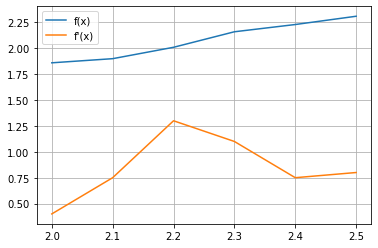

,x,y,y'
0,2.0,1.86,0.40
1,2.1,1.90,0.75
2,2.2,2.01,1.30
3,2.3,2.16,1.10
4,2.4,2.23,0.75
5,2.5,2.31,0.80


In [22]:
i = np.arange(1, 7, 1)
xi = [2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
yi = [1.86, 1.9, 2.01, 2.16, 2.23, 2.31]
n = len(xi)

m = diff_mid(xi, yi)
f = diff_fwd(xi, yi)
b = diff_bwd(xi, yi)
dyi = [f[0]] + list(m[1:n-1]) + [b[n-1]]
plot(xi, yi, dyi)
disp(xi, yi, dyi)